## Loading environment

In [1]:
import sys, getopt, os
import bonesis
import pandas as pd
from colomoto_jupyter import tabulate
import mpbn
import itertools
import math
import numpy
import networkx as nx
import pickle
#import ginsim
import re
import subprocess
import numpy as np
from matplotlib import pyplot as plt
from math import isnan
from copy import deepcopy 
sys.path.append('../../../py_src/')
import funForBonesis

In [2]:
#def add_obs_mutant_nonReach(mutation, phenotypes,data):
#    for p in phenotypes:
#        pMut = p+"_"+[*mutation][0]+"_"+str([*mutation.values()][0])
#        data[pMut] = data[p].copy()
#        data[pMut][[*mutation][0]] = [*mutation.values()][0]

## Loading binarized component activities for each HSPC states
These activities and their binariztation were computed on scRNA-seq data

In [3]:
geneOrder = ["Egr1","Junb","Bclaf1","Myc","Fli1","Gata2","Spi1","Cebpa","Gata1","Klf1","Tal1","Ikzf1","Zfpm1","CDK46CycD","CIPKIP"]


dataTable = pd.read_csv("../obsDataDis.csv",index_col = 0)




data = dataTable.to_dict("index")


clean_data = dict() #Bug of mpbn if nan in dict
for o in data.keys():
    clean_data[o] = {k: data[o][k] for k in data[o] if not isnan(data[o][k])}

data= clean_data
## add mutant obs

    

obsData = pd.DataFrame.from_dict(data, orient="index").fillna('')[geneOrder]

#Add some mutant obs

obsData = obsData[geneOrder].reindex(["iHSC", "srHSC", "qHSC","diff","pLymph","pNeuMast","pMk","pEr","zero"])


obsData = obsData.transpose()

obsDataView = obsData.style.apply(lambda x: ["background: ligthgrey" if v == "" else  "background: darkred" if v == 1.0 else "background: darkblue" for v in x], axis = 1).apply(lambda x: ["color: lightgrey" if v == "" else  "color: darkred" if v == 1.0 else "color: darkblue" for v in x], axis = 1)

#obsDataView = obsDataView.style.
obsDataView.set_precision(0)





,iHSC,srHSC,qHSC,diff,pLymph,pNeuMast,pMk,pEr,zero
Egr1,0,0,1,nan,0,0,0,0,nan
Junb,0,0,1,nan,0,0,0,0,nan
Bclaf1,1,1,0,nan,1,0,0,0,nan
Myc,0,0,1,nan,0,1,1,1,nan
Fli1,1,1,1,nan,0,0,1,0,nan
Gata2,1,0,1,nan,1,1,0,0,nan
Spi1,0,0,0,nan,1,1,0,0,nan
Cebpa,0,0,0,nan,0,1,0,0,nan
Gata1,0,0,0,nan,0,0,1,1,nan
Klf1,0,0,0,nan,0,0,0,1,nan


## Making some adjustements on the binarized data

Because no solution were obtained with the binarized data outputed from the scRNA-seq analysis, we made some adjustements for certain components in certain HSPC states. See our paper for more details.


In [4]:
## Adjustement
dataTable["Myc"].loc["pNeuMast"] =  float('NaN')
dataTable["Myc"].loc["pEr"] =  float('NaN')
dataTable["Myc"].loc["pMk"] =  float('NaN')
dataTable["CDK46CycD"].loc["pMk"] =  float('NaN')
dataTable["Bclaf1"].loc["pLymph"] =  float('NaN')
dataTable["CIPKIP"].loc["pLymph"] =  float('NaN')

dataTable["Egr1"].loc["srHSC"] =  float('NaN')
dataTable["Gata2"].loc["pNeuMast"] =  float('NaN')


data = dataTable.to_dict("index")


clean_data = dict() #Bug of mpbn if nan in dict
for o in data.keys():
    clean_data[o] = {k: data[o][k] for k in data[o] if not isnan(data[o][k])}

data= clean_data

## Add zero obs
data["zero"] ={'Egr1': 0.0,
 'Junb': 0,
 'Tal1': 0.0,
 'Bclaf1': 0.0,
 'Myc': 0.0,
 'Fli1': 0.0,
 'Gata2': 0.0,
 'Ikzf1': 0,
 'Spi1': 0,
 'Cebpa': 0,
 'Gata1': 0.0,
 'Klf1': 0,
 'Zfpm1': 0.0,
 'CIPKIP': 0,
 'CDK46CycD': 0.0}

pd.DataFrame(data)
pd.DataFrame(data)

#data["G0MkHSC"] = {"Klf1":0,'Junb': 1,'Tal1':1,'CIPKIP': 1,"Ikzf1":0,"Cebpa":0,"Spi1":0,"CDK46CycD":0}
#data["prolifNeuMast"] = {'Egr1': 0,'Junb': 0,'Tal1': 0,'Fli1': 0,'Spi1': 1,'Cebpa': 1,'Klf1': 0,'Zfpm1': 0.0,'CIPKIP': 0,"CDK46CycD":1}
#add_obs_mutant_nonReach({'Gata1': 0},["pEr","pMk"],data)
#add_obs_mutant_nonReach({'Fli1': 0},["pMk"],data)
#dataTable

/home/leonard/bin/miniconda3/envs/bonesis_env/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,iHSC,srHSC,qHSC,preDiff,pLymph,pNeuMast,pMk,pEr,zero
Egr1,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Junb,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Bclaf1,1.0,1.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0
Myc,0.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,0.0
Fli1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Gata2,1.0,0.0,1.0,0.0,1.0,NaN,0.0,0.0,0.0
Spi1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
Cebpa,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Gata1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
Klf1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
    

obsData = pd.DataFrame.from_dict(data, orient="index").fillna('')[geneOrder]

#Add some mutant obs

obsData = obsData[geneOrder].reindex(["iHSC", "srHSC", "qHSC","preDiff","pLymph","pNeuMast","pMk","pEr","zero"])


obsData = obsData.transpose()

obsDataView = obsData.style.apply(lambda x: ["background: ligthgrey" if v == "" else  "background: darkred" if v == 1.0 else "background: darkblue" for v in x], axis = 1).apply(lambda x: ["color: lightgrey" if v == "" else  "color: darkred" if v == 1.0 else "color: darkblue" for v in x], axis = 1)

#obsDataView = obsDataView.style.
obsDataView.set_precision(0)

,iHSC,srHSC,qHSC,preDiff,pLymph,pNeuMast,pMk,pEr,zero
Egr1,0,,1,0,0,0,0,0,0
Junb,0,0,1,0,0,0,0,0,0
Bclaf1,1,1,0,1,,0,0,0,0
Myc,0,0,1,1,0,,,,0
Fli1,1,1,1,0,0,0,1,0,0
Gata2,1,0,1,0,1,,0,0,0
Spi1,0,0,0,1,1,1,0,0,0
Cebpa,0,0,0,0,0,1,0,0,0
Gata1,0,0,0,0,0,0,1,1,0
Klf1,0,0,0,0,0,0,0,1,0


## Loading influence graph
A subset of 13 TFs and 2 cell cycle complexes were selected based on our scRNA-seq analysis and prior knowledge of early hematopoiesis. This influence graph is based on the transcriptional network of these components deduced from scRNA-seq data with SCENIC and interactions previously characterized in the literature.

# computing graph layout...


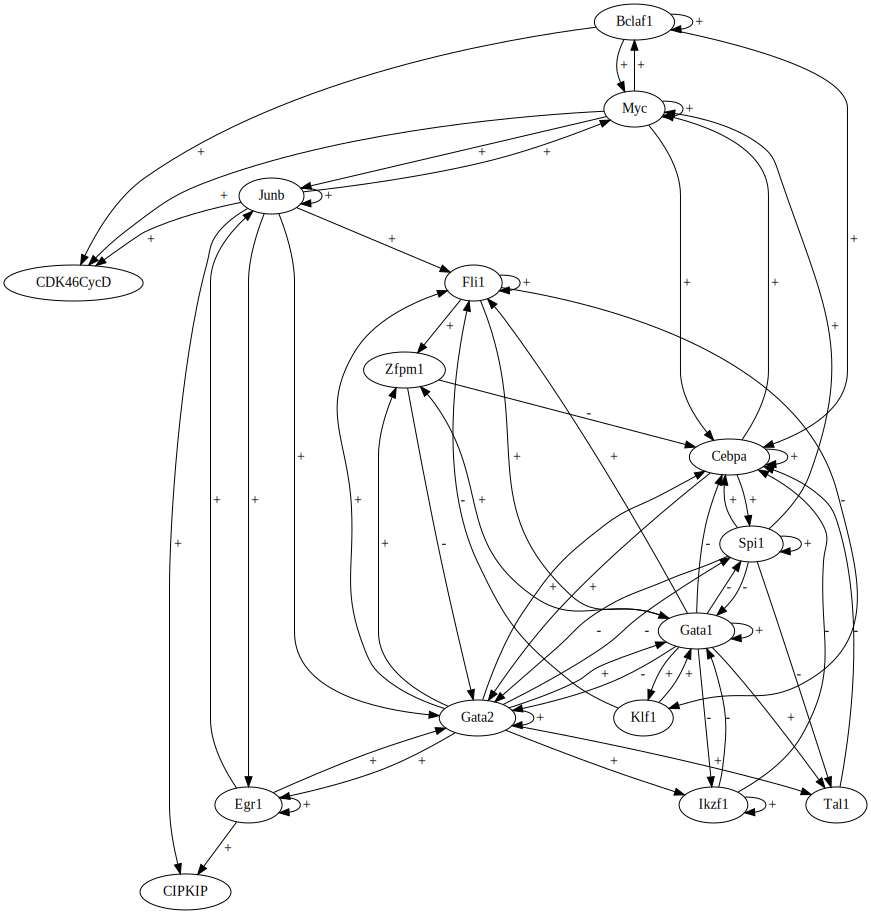

In [6]:
influenceGraphTable = pd.read_table("../influenceGraph/infGraphTable45.tsv")
influenceGraphTable = influenceGraphTable.drop_duplicates(subset=['tf', 'target', 'mor'])
len(influenceGraphTable)
    
# Loading constraints
    
# Creating influence graph
inf = []
for r in influenceGraphTable.index:
    inf.append((influenceGraphTable["tf"][r],influenceGraphTable["target"][r],dict(sign= influenceGraphTable["mor"][r])))


#inf.remove(('Junb', 'Gata2', {'sign': 1})) #  no trust in auto neg from scenic 

dom0 = bonesis.InfluenceGraph(inf, maxclause = 3,exact=False)
allEdges = funForBonesis.multiDiGraphToEdgeList(dom0)
dom0
#inf.append(('Gata1', 'CDK46CycD', {'sign': 1})) # in litt and in Scenic in 42 runs    

dom = bonesis.InfluenceGraph(inf, maxclause = 3,exact=True)


#len(dom.edges())

dom

In [7]:
len(inf)

60

## Definition of the dynamical constraints with Bonesis
Our goal is to obtain a Boolean network relying on the input influence graph able to reproduce the dynamics observed in the scRNA seq analysis (pseudotrajectory analysis) 

In [8]:
dom = bonesis.InfluenceGraph(inf,exact=False, maxclause = 3)
dom
bo = bonesis.BoNesis(dom, data)
bo.settings["parallel"] = 24

fLymph = bo.fixed(~bo.obs("pLymph"))
fEr = bo.fixed(~bo.obs("pEr"));
fMk = bo.fixed(~bo.obs("pMk"));
fNeuMast = bo.fixed(~bo.obs("pNeuMast"));
start = ~bo.obs("iHSC")

start >= ~bo.obs("srHSC")
start >= ~bo.obs("qHSC")
start >= fLymph
start >= ~bo.obs("preDiff") >= fEr
start >= ~bo.obs("preDiff") >= fMk
start >= ~bo.obs("preDiff") >= fNeuMast

~bo.obs("srHSC") >= start
~bo.obs("qHSC") >= start
~bo.obs("preDiff") / ~bo.obs("qHSC")
~bo.obs("preDiff") / ~bo.obs("srHSC")
~bo.obs("preDiff") / start
~bo.obs('zero') / fNeuMast
~bo.obs('zero') / fMk
~bo.obs('zero') / fEr

~bo.obs('zero') / fLymph
~bo.obs("iHSC") >> "fixpoints" ^ {bo.obs(obs) for obs in ["pLymph", "pNeuMast","pEr","pMk","zero"]};


We can save the encoded problem in asp

In [9]:
view = bo.boolean_networks()
view.standalone(output_filename="test.asp")


## Inference of a diverse subset of solutions
We infer Boolean network solutions of our problem by imposing diversity among our solutions and discarding solutions with cyclic attractors because we assume that the biological system does not exhibit oscillatory behaviors.

In [10]:
solutions = []
for bn in bo.diverse_boolean_networks(): 
    if(funForBonesis.has_cyclic(bn)):
        print("HAS CYCLIC ATTRACTORS, IGNORING")
        continue
    if len(solutions) > 1000:
        break
    solutions.append(bn)
    print(len(solutions))
print(len(solutions))

Grounding...done in 0.1s
Found 1 solutions in 2.9s (first in 2.9s; rate 2.9s)1
Found 2 solutions in 3.2s (first in 2.9s; rate 1.6s)2
Found 3 solutions in 3.4s (first in 2.9s; rate 1.1s)3
Found 4 solutions in 3.6s (first in 2.9s; rate 0.9s)4
Found 5 solutions in 3.8s (first in 2.9s; rate 0.8s)5
Found 6 solutions in 4.0s (first in 2.9s; rate 0.7s)6
Found 7 solutions in 4.2s (first in 2.9s; rate 0.6s)7
Found 8 solutions in 4.5s (first in 2.9s; rate 0.6s)8
Found 9 solutions in 4.7s (first in 2.9s; rate 0.5s)9
Found 10 solutions in 4.9s (first in 2.9s; rate 0.5s)10
Found 11 solutions in 5.4s (first in 2.9s; rate 0.5s)11
Found 12 solutions in 5.6s (first in 2.9s; rate 0.5s)12
Found 13 solutions in 5.9s (first in 2.9s; rate 0.5s)13
Found 14 solutions in 6.1s (first in 2.9s; rate 0.4s)14
Found 15 solutions in 6.4s (first in 2.9s; rate 0.4s)15
Found 16 solutions in 6.6s (first in 2.9s; rate 0.4s)16
Found 17 solutions in 6.9s (first in 2.9s; rate 0.4s)17
Found 18 solutions in 7.1s (first in 2.9s

Found 143 solutions in 58.1s (first in 2.9s; rate 0.4s)143
Found 144 solutions in 58.8s (first in 2.9s; rate 0.4s)144
Found 145 solutions in 59.4s (first in 2.9s; rate 0.4s)145
Found 146 solutions in 60.0s (first in 2.9s; rate 0.4s)146
Found 147 solutions in 60.7s (first in 2.9s; rate 0.4s)147
Found 148 solutions in 61.3s (first in 2.9s; rate 0.4s)148
Found 149 solutions in 62.0s (first in 2.9s; rate 0.4s)149
Found 150 solutions in 62.7s (first in 2.9s; rate 0.4s)150
Found 151 solutions in 63.4s (first in 2.9s; rate 0.4s)151
Found 152 solutions in 64.0s (first in 2.9s; rate 0.4s)152
Found 153 solutions in 64.7s (first in 2.9s; rate 0.4s)153
Found 154 solutions in 65.4s (first in 2.9s; rate 0.4s)154
Found 155 solutions in 66.1s (first in 2.9s; rate 0.4s)155
Found 156 solutions in 66.9s (first in 2.9s; rate 0.4s)156
Found 157 solutions in 67.6s (first in 2.9s; rate 0.4s)157
Found 158 solutions in 68.2s (first in 2.9s; rate 0.4s)158
Found 159 solutions in 69.0s (first in 2.9s; rate 0.4s)1

In [11]:
len(solutions)

201

In [12]:
solutions[2]

Bclaf1 <- Myc
CDK46CycD <- Junb|Myc
CIPKIP <- Egr1|Junb
Cebpa <- (!Zfpm1&!Tal1&!Ikzf1&Bclaf1)|(!Zfpm1&!Tal1&!Ikzf1&Spi1)
Egr1 <- Gata2&Junb
Fli1 <- Junb|(Gata2&Fli1)|(!Klf1&Fli1&Gata1)
Gata1 <- (!Ikzf1&Fli1)|(Gata2&!Spi1)|(Klf1&!Ikzf1&Gata1)
Gata2 <- (Egr1&Cebpa)|(Gata2&!Gata1&!Zfpm1)
Ikzf1 <- (Gata2&!Gata1)|(Gata2&Ikzf1)
Junb <- Myc|(Junb&Egr1)
Klf1 <- !Fli1&Gata1
Myc <- (Bclaf1&Cebpa)|(Junb&Myc&Cebpa)|(Spi1&Myc&Cebpa)
Spi1 <- (!Gata1&Spi1)|(!Gata2&!Gata1&Cebpa)|(!Gata2&Spi1&Cebpa)
Tal1 <- Gata1
Zfpm1 <- Fli1|Gata1

In [13]:
table = pd.DataFrame(solutions)
for n in table.nunique().index:
    if table.nunique()[n] > 1:
        print(n)
        print(pd.DataFrame(table[n].unique())) 

CDK46CycD
                                       0
0                               Junb|Myc
1                      Junb|(Bclaf1&Myc)
2             (Bclaf1&Junb)|(Bclaf1&Myc)
3  (Bclaf1&Junb)|(Bclaf1&Myc)|(Junb&Myc)
4               (Bclaf1&Junb)|(Junb&Myc)
Cebpa
                                                   0
0  (!Zfpm1&!Tal1&!Ikzf1&Bclaf1)|(!Zfpm1&!Ikzf1&!G...
1  (!Zfpm1&!Tal1&!Ikzf1&Bclaf1)|(Spi1&!Tal1&!Zfpm...
2  (!Zfpm1&!Tal1&!Ikzf1&Bclaf1)|(!Zfpm1&!Tal1&!Ik...
3  (Bclaf1&!Tal1&!Zfpm1&!Ikzf1&!Gata1)|(Spi1&!Tal...
Fli1
                                                   0
0               Junb|(Gata2&Fli1)|(!Klf1&Fli1&Gata1)
1                    Junb|(Gata2&Fli1)|(!Klf1&Gata1)
2         Junb|(Gata2&Fli1&Gata1)|(!Klf1&Fli1&Gata1)
3  (Junb&!Klf1)|(Gata2&Fli1&Gata1)|(!Klf1&Fli1&Ga...
4  (Junb&!Klf1)|(Junb&Fli1&Gata1)|(!Klf1&Fli1&Gata1)
5  (Junb&!Klf1)|(!Klf1&Fli1&Gata1)|(Gata2&Junb&Fl...
Gata1
                                                   0
0    (!Ikzf1&Fli1)|(Gata2&!Spi1)|(Klf1

In [14]:
pd.DataFrame(solutions[2].attractors(reachable_from=data["iHSC"]))

,Bclaf1,CDK46CycD,CIPKIP,Cebpa,Egr1,Fli1,Gata1,Gata2,Ikzf1,Junb,Klf1,Myc,Spi1,Tal1,Zfpm1
0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1


## Exploring the behavior of solutions in the face of mutating perturbations

We define two functions to perform this analysis. Our strategy is to find for each of the solutions inferred, all reachable attractors from our initial iHSC state for a particular alteration (KO/KI). We performed this analysis for the KO of each of the TFs in the networks as well as the KI for the components that were found to be overactivated under aging conditions in previous studies.

In [15]:
def testPerturb(model,perturbations,data):
    test_mut = model.copy()
    for perturbation in perturbations:
        del test_mut[[*perturbation.keys()][0]]
        test_mut[[*perturbation.keys()][0]] = [*perturbation.values()][0]
        data_mut = deepcopy(data)
        if ([*perturbation.values()][0] == 1) | ([*perturbation.values()][0] == 0):
            data_mut["iHSC"][[*perturbation.keys()][0]] = [*perturbation.values()][0]
    att = pd.DataFrame(test_mut.attractors(reachable_from=data_mut["iHSC"]))[geneOrder]
    return att

In [16]:
def getMutAttractors(perturbations,sol,data):
    geneMut = list(perturbations[0].keys())[0]
    mut = []
    for s in solutions :
        if list(perturbations[0].values())[0] == 0 :
            koStr = "KO"
        else:
            koStr = "KI"
            

        possiblePhDf = pd.DataFrame(testPerturb(s,perturbations,data))
        possiblePhDf.sort_values(by= geneOrder, inplace=True)
        possiblePhDf.index = [str(i) for i in range(0,len(possiblePhDf))]
        possiblePh = possiblePhDf.to_dict() 
        if possiblePh not in mut:
            mut.append(possiblePh)
            
    possiblePhAll = pd.DataFrame(mut[0])
    possiblePhAll = possiblePhAll.rename(index=lambda s: geneMut + koStr + "_0" + "_" + s)
    i=1
    for a in mut[1:]:
        df = pd.DataFrame(a)
        df.index = [str(j) for j in range(0,len(df))]
        df = df.rename(index=lambda s: geneMut + koStr +"_"+ str(i) + "_" + s)
        possiblePhAll = possiblePhAll.append(df)

        i += 1

    return possiblePhAll



## Test all the KO mutations

In [17]:
getMutAttractors(perturbations=[{"Spi1":0}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
Spi1KO_0_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Spi1KO_0_1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
Spi1KO_0_2,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0


In [18]:
getMutAttractors(perturbations=[{"Cebpa":0}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
CebpaKO_0_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CebpaKO_0_1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
CebpaKO_0_2,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0


In [19]:
getMutAttractors(perturbations=[{"Junb":0}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
JunbKO_0_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
JunbKO_0_1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
JunbKO_0_2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
JunbKO_0_3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
JunbKO_0_4,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
JunbKO_0_5,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0
JunbKO_1_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
JunbKO_1_1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
JunbKO_1_2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
JunbKO_1_3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0


In [20]:
getMutAttractors(perturbations=[{"Egr1":0}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
Egr1KO_0_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Egr1KO_0_1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
Egr1KO_0_2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Egr1KO_0_3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
Egr1KO_0_4,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0


In [21]:
getMutAttractors(perturbations=[{"Gata2":0}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
Gata2KO_0_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Gata2KO_0_1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
Gata2KO_0_2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Gata2KO_0_3,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0


In [22]:
getMutAttractors(perturbations=[{"Gata1":0}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
Gata1KO_0_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Gata1KO_0_1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Gata1KO_0_2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
Gata1KO_0_3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
Gata1KO_1_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Gata1KO_1_1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Gata1KO_1_2,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
Gata1KO_1_3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0


In [23]:
getMutAttractors(perturbations=[{"Myc":0}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
MycKO_0_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
MycKO_0_1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
MycKO_0_2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
MycKO_0_3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
MycKO_0_4,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0


In [24]:
getMutAttractors(perturbations=[{"Ikzf1":0}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
Ikzf1KO_0_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ikzf1KO_0_1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
Ikzf1KO_0_2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Ikzf1KO_0_3,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0
Ikzf1KO_0_4,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0


In [25]:
getMutAttractors(perturbations=[{"Bclaf1":0}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
Bclaf1KO_0_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bclaf1KO_0_1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
Bclaf1KO_0_2,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0


In [26]:
getMutAttractors(perturbations=[{"Tal1":0}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
Tal1KO_0_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Tal1KO_0_1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
Tal1KO_0_2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Tal1KO_0_3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
Tal1KO_0_4,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [27]:
getMutAttractors(perturbations=[{"Zfpm1":0}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
Zfpm1KO_0_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Zfpm1KO_0_1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0
Zfpm1KO_0_2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Zfpm1KO_0_3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
Zfpm1KO_0_4,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zfpm1KO_7_3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
Zfpm1KO_7_4,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
Zfpm1KO_7_5,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0
Zfpm1KO_7_6,0,1,1,1,1,0,1,1,1,0,0,0,0,1,1


In [28]:
getMutAttractors(perturbations=[{"Klf1":0}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
Klf1KO_0_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Klf1KO_0_1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Klf1KO_0_2,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
Klf1KO_0_3,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0


In [29]:
getMutAttractors(perturbations=[{"Fli1":0}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
Fli1KO_0_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fli1KO_0_1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
Fli1KO_0_2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Fli1KO_0_3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
Fli1KO_0_4,0,1,1,1,0,0,1,1,0,0,0,0,0,1,1
Fli1KO_0_5,1,1,0,0,0,1,1,0,0,0,0,1,0,1,1
Fli1KO_1_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fli1KO_1_1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
Fli1KO_1_2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Fli1KO_1_3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0


## Test 2 KI mutations

In [30]:
getMutAttractors(perturbations=[{"Junb":1}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
JunbKI_0_0,0,1,0,0,1,0,0,0,1,0,1,0,1,1,1
JunbKI_1_0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1


In [31]:
getMutAttractors(perturbations=[{"Egr1":1}],sol=solutions,data = data)

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
Egr1KI_0_0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Egr1KI_0_1,1,0,0,0,0,0,0,0,1,1,1,0,1,0,1
Egr1KI_0_2,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1
Egr1KI_0_3,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1
Egr1KI_0_4,1,1,0,0,1,0,0,0,1,0,1,0,1,1,1
Egr1KI_1_0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Egr1KI_1_1,1,0,0,0,0,0,0,0,1,1,1,0,1,0,1
Egr1KI_1_2,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1
Egr1KI_1_3,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1
Egr1KI_1_4,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1
